## Intersection over Union (IoU)
Reference: https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/ <br><br>
But modified

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bb1 = np.array([0.0, 77.0, 23.0, 26.0])
bb2 = np.array([15.0, 51.0, 41.0, 0.0])

print(bb1, bb2)

[ 0. 77. 23. 26.] [15. 51. 41.  0.]


In [3]:
def get_iou(boxA, boxB):
    
    xA = max(boxA[0], boxB[0])
    yA = min(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = max(boxA[3], boxB[3])
    print(xA, yA, xB, yB)

    interArea = abs(max((xB - xA), 0) *  min((yB - yA), 0))
    
    if interArea == 0:
        return 0
    
    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))
                   
    # compute the intersection over union
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

In [4]:
iou = get_iou(bb1, bb2)
iou

15.0 51.0 23.0 26.0


0.08699434536755112

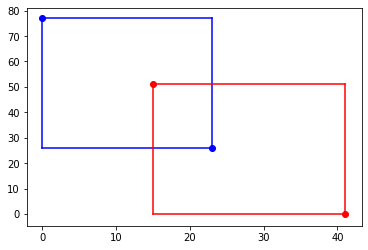

In [5]:
plt.scatter(bb1[0], bb1[1], c = 'b')
plt.scatter(bb1[2], bb1[3], c = 'b')
plt.scatter(bb2[0], bb2[1], c = 'r')
plt.scatter(bb2[2], bb2[3], c = 'r')

plt.plot([bb1[0], bb1[2]], [bb1[1], bb1[1]], c = 'b')
plt.plot([bb1[2], bb1[2]], [bb1[1], bb1[3]], c = 'b')
plt.plot([bb1[2], bb1[0]], [bb1[3], bb1[3]], c = 'b')
plt.plot([bb1[0], bb1[0]], [bb1[3], bb1[1]], c = 'b')

plt.plot([bb2[0], bb2[2]], [bb2[1], bb2[1]], c = 'r')
plt.plot([bb2[2], bb2[2]], [bb2[1], bb2[3]], c = 'r')
plt.plot([bb2[2], bb2[0]], [bb2[3], bb2[3]], c = 'r')
plt.plot([bb2[0], bb2[0]], [bb2[3], bb2[1]], c = 'r')

plt.show()